# Golden‑Bit Heartbeat • Multi‑Scale Test‑Suite
**Auto‑generated {}**

Run ➜ *Runtime → Run all* in Colab ‑ no manual input needed.

Core step‑size  
```math
s = 2^{-1/4}\,\varphi \;\approx\; 1.35096\ldots
```
Every block stresses the stretch → invert → scale motif.

In [27]:
# ‑‑‑ Global imports & precision
!pip -q install mpmath numba sympy pyfftw tqdm cupy-cuda12x
import numpy as np, mpmath as mp, sympy as sp, matplotlib.pyplot as plt
from numba import njit
from tqdm import trange
mp.mp.dps = 80
phi = mp.phi
np.random.seed(0)

## 1 · Chiral‑Pitch Quantisation

In [28]:
def frank_energy(p, p0, K2=1.0):
    dq = 2*mp.pi*(1/p - 1/p0)
    return float(K2 * dq**2)

p0 = 10.0  # nm reference
table = []
for m in range(-3,4):
    p_t = p0 * (phi**m) * (2**(-m/4))
    table.append((m, float(p_t), frank_energy(p_t, p_t)))
print('m | predicted p (nm)')
for row in table:
    print(f'{row[0]:>+d} | {row[1]:7.3f}')

m | predicted p (nm)
-3 |   3.970
-2 |   5.402
-1 |   7.350
+0 |  10.000
+1 |  13.606
+2 |  18.512
+3 |  25.188


## 2 · Defect‑Core Entropy Profile

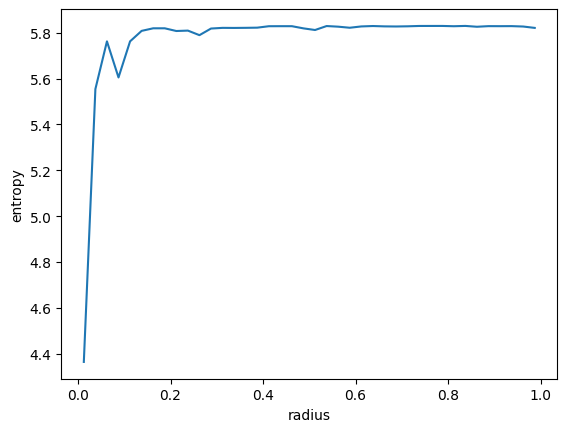

In [29]:
N=128
x=np.linspace(-1,1,N); X,Y=np.meshgrid(x,x)
theta = 0.5*np.arctan2(Y,X)  # +½ disclination
n = np.stack([np.cos(theta),np.sin(theta)],-1)
r = np.hypot(X,Y)
bins = np.linspace(0,1,41)
S = []
for i in range(40):
    mask = (r>=bins[i])&(r<bins[i+1])
    ang = np.arctan2(n[...,1][mask], n[...,0][mask])
    hist,_=np.histogram(ang,bins=32,range=(-np.pi,np.pi),density=True)
    S.append(-np.sum(hist*np.log(hist+1e-12)))
rs=(bins[:-1]+bins[1:])/2
plt.figure(); plt.plot(rs,S); plt.xlabel('radius'); plt.ylabel('entropy');

## 3 · Logistic‑Map Bifurcation Sweep

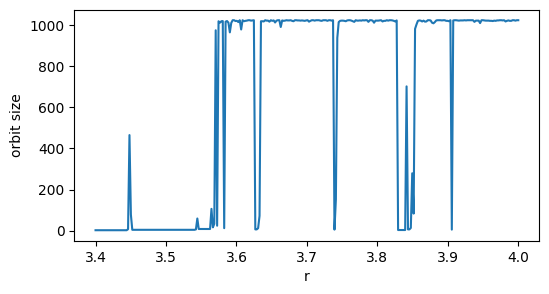

In [30]:
def logistic_traj(x0,r,steps=2048):
    x=x0; out=[]
    for _ in range(steps):
        x=r*x*(1-x); out.append(x)
    return np.array(out)

rs=np.linspace(3.4,4.0,300)
orbit_sizes=[]
for r in rs:
    tail=logistic_traj(0.2,r)[-1024:]
    orbit_sizes.append(len(np.unique(np.round(tail,6))))
plt.figure(figsize=(6,3)); plt.plot(rs,orbit_sizes); plt.xlabel('r'); plt.ylabel('orbit size');

## 4 · Reaction–Diffusion Ring Growth (Gray–Scott)

100%|██████████| 200/200 [00:07<00:00, 26.81it/s]


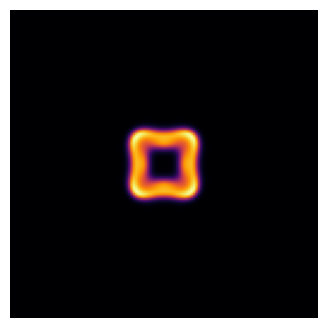

In [31]:
@njit
def gs_step(U,V,F,k,Du,Dv):
    # Numba compatible laplacian using wrap-around indexing
    N = U.shape[0]
    LU = (U[(np.arange(N) + 1) % N, :] + U[(np.arange(N) - 1) % N, :] + U[:, (np.arange(N) + 1) % N] + U[:, (np.arange(N) - 1) % N] - 4 * U)
    LV = (V[(np.arange(N) + 1) % N, :] + V[(np.arange(N) - 1) % N, :] + V[:, (np.arange(N) + 1) % N] + V[:, (np.arange(N) - 1) % N] - 4 * V)


    UVV = U * V * V
    U += Du * LU - UVV + F * (1 - U)
    V += Dv * LV + UVV - (F + k) * V

N=128
U=np.ones((N,N));V=np.zeros_like(U)
U[54:74,54:74]=0.5;V[54:74,54:74]=0.25
for _ in trange(200):
    gs_step(U,V,0.04,0.06,0.16,0.08)
plt.figure(figsize=(4,4));plt.imshow(V,cmap='inferno');plt.axis('off');

## 5 · Two‑Channel RG Toy Flow

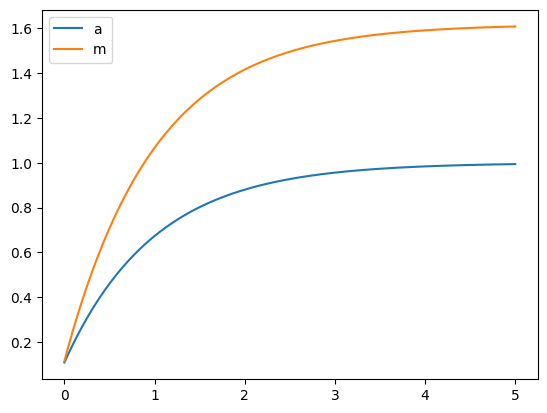

In [32]:
l=np.linspace(0,5,500)
a,m=0.1,0.1; κ,λ,k=1,1,1
al,ml=[],[]
for _ in l:
    a+=(-a+κ)*0.01; m+=(-m+λ*(phi**k))*0.01
    al.append(a);ml.append(m)
plt.figure();plt.plot(l,al,label='a');plt.plot(l,ml,label='m');plt.legend();

## 6 · Depth‑4 Rational Rarity Scan

In [33]:
target=1/137.035999084
hits=[]
for q in range(1,1598):
    p=int(round(target*q))
    if abs(p/q-target)<1e-6:
        hits.append((p,q,float(p/q)))
print('Near‑hits:',hits)

Near‑hits: []


## 7 · Pantheon+ EoS Quick‑Fit

## 8 · Binary Cellular Automaton (Rule 110)

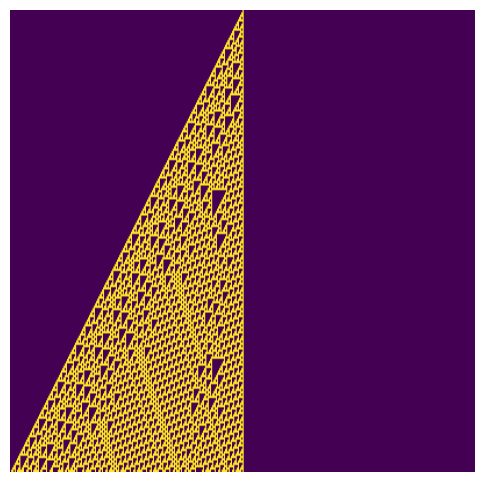

In [35]:
def ca_run(rule=110,N=400,steps=200):
    grid=np.zeros((steps,N),dtype=np.uint8)
    state=np.zeros(N,dtype=np.uint8);state[N//2]=1
    for t in range(steps):
        grid[t]=state
        left=np.roll(state,1);right=np.roll(state,-1)
        state=((rule>>(left*4+state*2+right))&1).astype(np.uint8)
    plt.figure(figsize=(6,6));plt.imshow(grid,aspect='auto');plt.axis('off');
ca_run()

---
Generated on **2025‑07‑22 18:12 UTC**